# Đồ án: Ứng dụng phân tích dữ liệu thông minh

Thành viên nhóm: <tên> bao gồm:
- MSSV: <Họ tên>

# A. Giới thiệu đề tài

## 1. Ngữ cảnh

Hiện trạng: 

Chọn đề tài để:


## 2. Thu thập và mô tả dữ liệu

Dữ liệu được thu thập từ trang ...., bằng API. 

Dữ liệu Spotify các nước đông nam á(...), có các trường tiêu biểu 
- 
- 
- 


# B. Bài phân tích

## 0. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df0 =pd.read_csv('data/dataset.csv')
#df0.head()

In [3]:
column_list = []

In [4]:
df =pd.read_csv('data/stream_tracks.csv')
df.head()

,artists_id,album_id,track_id,track_uri,track_name,track_release_date,track_date_added,track_duration_ms,track_popularity,track_position,is_explicit,country,timestamp,stream_count
0,"3eVa5w3URK5duf6eyVDbu9, 0du5cEVh5yTK9QJze8zA0C",2IYQwwgxgOIn7t3iF6ufFD,5vNRhkKd0yEAg8suGBpjeY,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,2024-10-31T12:37:43Z,169917,96,1,False,Indonesia,2024-11-01,182002510
1,"1HY2Jd0NmPuamShAr6KMms, 0du5cEVh5yTK9QJze8zA0C",10FLjwfpbxLmW8c25Xyc2N,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,2024-10-31T12:37:43Z,251667,100,2,False,Indonesia,2024-11-01,793128354
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,False,Indonesia,2024-11-01,206778990
3,"5Plk4JdCzMxhAHSRTEsxJp, 1lg1jqQMMJQQFFMnkxn0zV",59ptvvKVVgt5Oo8R6uYDda,7BgFlmOxrL7M1jVGoxqy37,spotify:track:7BgFlmOxrL7M1jVGoxqy37,Masing Masing,2023-11-03,2024-10-31T12:37:43Z,234589,77,4,False,Indonesia,2024-11-01,43426743
4,0f6TyESD8E1mD2oLJ4TGv1,6E4sl58YgjMqfUBNGOfAUa,0PtJbtW50jcvvswNPn3QGd,spotify:track:0PtJbtW50jcvvswNPn3QGd,Serana,2022-09-06,2024-10-31T12:37:43Z,250000,77,5,False,Indonesia,2024-11-01,321290834


In [5]:
df.columns

Index(['artists_id', 'album_id', 'track_id', 'track_uri', 'track_name',
       'track_release_date', 'track_date_added', 'track_duration_ms',
       'track_popularity', 'track_position', 'is_explicit', 'country',
       'timestamp', 'stream_count'],
      dtype='object')

In [6]:
df1 = pd.read_csv('data/artists.csv')
df1.head()

,artist_id,artist_uri,artist_name,artist_genres,artist_popularity,artist_follower,artist_image_url,timestamp
0,3eVa5w3URK5duf6eyVDbu9,spotify:artist:3eVa5w3URK5duf6eyVDbu9,ROSÉ,['k-pop'],83,7651191,https://i.scdn.co/image/ab6761610000e5eb727a1f...,2024-11-01
1,0du5cEVh5yTK9QJze8zA0C,spotify:artist:0du5cEVh5yTK9QJze8zA0C,Bruno Mars,"['dance pop', 'pop']",95,61284274,https://i.scdn.co/image/ab6761610000e5ebc36dd9...,2024-11-01
2,1HY2Jd0NmPuamShAr6KMms,spotify:artist:1HY2Jd0NmPuamShAr6KMms,Lady Gaga,"['art pop', 'dance pop', 'pop']",92,32437331,https://i.scdn.co/image/ab6761610000e5eb4b09cd...,2024-11-01
3,47z98pKd71yIbgXwe9LPVC,spotify:artist:47z98pKd71yIbgXwe9LPVC,Bernadya,[],83,2067579,https://i.scdn.co/image/ab6761610000e5eb6d1dbc...,2024-11-01
4,5Plk4JdCzMxhAHSRTEsxJp,spotify:artist:5Plk4JdCzMxhAHSRTEsxJp,Ernie Zakri,['malaysian pop'],64,177522,https://i.scdn.co/image/ab6761610000e5ebd4e158...,2024-11-01


In [7]:
df2 = pd.read_csv('data/full_tracks.csv')
df2.head()

,artists_id,album_id,track_id,track_uri,track_name,track_release_date,track_date_added,track_duration_ms,track_popularity,track_position,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"3eVa5w3URK5duf6eyVDbu9, 0du5cEVh5yTK9QJze8zA0C",2IYQwwgxgOIn7t3iF6ufFD,5vNRhkKd0yEAg8suGBpjeY,spotify:track:5vNRhkKd0yEAg8suGBpjeY,APT.,2024-10-18,2024-10-31T12:37:43Z,169917,96,1,...,-4.477,0,0.2600,0.0283,0.0000,0.355,0.939,149.027,169917,4
1,"1HY2Jd0NmPuamShAr6KMms, 0du5cEVh5yTK9QJze8zA0C",10FLjwfpbxLmW8c25Xyc2N,2plbrEY59IikOBgBGLjaoe,spotify:track:2plbrEY59IikOBgBGLjaoe,Die With A Smile,2024-08-16,2024-10-31T12:37:43Z,251667,100,2,...,-7.777,0,0.0304,0.3080,0.0000,0.122,0.535,157.969,251668,3
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-10.420,1,0.0392,0.9420,0.0498,0.118,0.244,85.744,200476,4
3,"5Plk4JdCzMxhAHSRTEsxJp, 1lg1jqQMMJQQFFMnkxn0zV",59ptvvKVVgt5Oo8R6uYDda,7BgFlmOxrL7M1jVGoxqy37,spotify:track:7BgFlmOxrL7M1jVGoxqy37,Masing Masing,2023-11-03,2024-10-31T12:37:43Z,234589,77,4,...,-5.352,1,0.0292,0.7200,0.0000,0.251,0.389,133.845,234590,4
4,0f6TyESD8E1mD2oLJ4TGv1,6E4sl58YgjMqfUBNGOfAUa,0PtJbtW50jcvvswNPn3QGd,spotify:track:0PtJbtW50jcvvswNPn3QGd,Serana,2022-09-06,2024-10-31T12:37:43Z,250000,77,5,...,-5.403,1,0.0293,0.0624,0.3720,0.126,0.247,130.029,250000,4


In [8]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(300, 14)
(204, 8)
(300, 26)


In [9]:
df.columns

Index(['artists_id', 'album_id', 'track_id', 'track_uri', 'track_name',
       'track_release_date', 'track_date_added', 'track_duration_ms',
       'track_popularity', 'track_position', 'is_explicit', 'country',
       'timestamp', 'stream_count'],
      dtype='object')

In [10]:
# Merge the dataframes
df1 = df1.rename(columns={'artist_id':'artists_id'})
# join the dataframes
df0 = df.merge(df1, on='artists_id', how='inner')
df0 = df0.merge(df2, on='artists_id', how='inner')
df0.head()


,artists_id,album_id_x,track_id_x,track_uri_x,track_name_x,track_release_date_x,track_date_added_x,track_duration_ms_x,track_popularity_x,track_position_x,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-10.420,1,0.0392,0.942,0.04980,0.118,0.244,85.744,200476,4
1,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-9.455,0,0.0325,0.608,0.00797,0.198,0.299,84.956,182903,4
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-9.794,1,0.0371,0.877,0.02630,0.115,0.215,78.335,191141,4
3,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-12.370,1,0.0331,0.892,0.26600,0.138,0.253,90.147,238880,4
4,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,spotify:track:7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,2024-10-31T12:37:43Z,200476,84,3,...,-9.695,1,0.0306,0.904,0.14600,0.116,0.243,149.960,284137,4


In [11]:
df0.columns

Index(['artists_id', 'album_id_x', 'track_id_x', 'track_uri_x', 'track_name_x',
       'track_release_date_x', 'track_date_added_x', 'track_duration_ms_x',
       'track_popularity_x', 'track_position_x', 'is_explicit_x', 'country_x',
       'timestamp_x', 'stream_count', 'artist_uri', 'artist_name',
       'artist_genres', 'artist_popularity', 'artist_follower',
       'artist_image_url', 'timestamp_y', 'album_id_y', 'track_id_y',
       'track_uri_y', 'track_name_y', 'track_release_date_y',
       'track_date_added_y', 'track_duration_ms_y', 'track_popularity_y',
       'track_position_y', 'is_explicit_y', 'country_y', 'timestamp',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [12]:
# xóa các cột có đuôi là _y
df0 = df0[df0.columns.drop(list(df0.filter(regex='_y')))]
# rename các cột có đuôi là _x thành ''
df0.columns = df0.columns.str.replace('_x', '')
df0.columns

Index(['artists_id', 'album_id', 'track_id', 'track_uri', 'track_name',
       'track_release_date', 'track_date_added', 'track_duration_ms',
       'track_popularity', 'track_position', 'is_explicit', 'country',
       'timestamp', 'stream_count', 'artist_uri', 'artist_name',
       'artist_genres', 'artist_popularity', 'artist_follower',
       'artist_image_url', 'timestamp', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [13]:
df0 = df0.drop(columns=['track_uri', 'track_date_added',
       'timestamp', 'timestamp', 'timestamp', 'timestamp',
       'timestamp', 'timestamp', 'timestamp', 'artist_uri', 'artist_follower',
       'artist_image_url', 'timestamp', 'timestamp', 'timestamp', 'timestamp',
       'timestamp', 'timestamp', 'timestamp', 'timestamp', 'danceability',
       'energy', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'])
df0.head()

,artists_id,album_id,track_id,track_name,track_release_date,track_duration_ms,track_popularity,track_position,is_explicit,country,stream_count,artist_name,artist_genres,artist_popularity,mode
0,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
1,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,0
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
3,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
4,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1


In [14]:
df0.shape

(811, 15)

In [15]:
df0.to_csv('data/clean_data.csv', index=False)

**Lưu ý: Code này chỉ 1 thành viên chạy 1 lần. Các thành viên khác chỉ cần download `clean_data.csv` về phân tích.**

## 1. Tiền xử lý dữ liệu

In [16]:
df = pd.read_csv('data/clean_data.csv')
df.head()

,artists_id,album_id,track_id,track_name,track_release_date,track_duration_ms,track_popularity,track_position,is_explicit,country,stream_count,artist_name,artist_genres,artist_popularity,mode
0,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
1,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,0
2,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
3,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1
4,47z98pKd71yIbgXwe9LPVC,5K8xqV7MCe3UIfedVAlZSe,7zOVh5fGpEwSbZd0g9z80B,Satu Bulan,2023-06-22,200476,84,3,False,Indonesia,206778990,Bernadya,[],83,1


In [17]:
df.shape

(811, 15)

### 1.1. Xử lý dữ liệu thiếu

In [18]:
df.isnull().sum()

artists_id            0
album_id              0
track_id              0
track_name            0
track_release_date    0
track_duration_ms     0
track_popularity      0
track_position        0
is_explicit           0
country               0
stream_count          0
artist_name           0
artist_genres         0
artist_popularity     0
mode                  0
dtype: int64

Qua kiểm tra data không có dữ liệu thiếu trong quá trình thu thập.

### 1.2. Xử lý trùng lặp

In [19]:
df.duplicated().sum()

546

Qua kiểm tra dữ liệu có 546 dòng bị trùng lặp. Những dòng này là những dòng bị lỗi trong quá trình thu thập dữ liệu. Nên nhóm quyết định xóa những dòng này.

In [20]:
df = df.drop_duplicates()
df.shape

(265, 15)

### 1.3. Xử lý dữ liệu ngoại lai

In [21]:
numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[object]).columns 

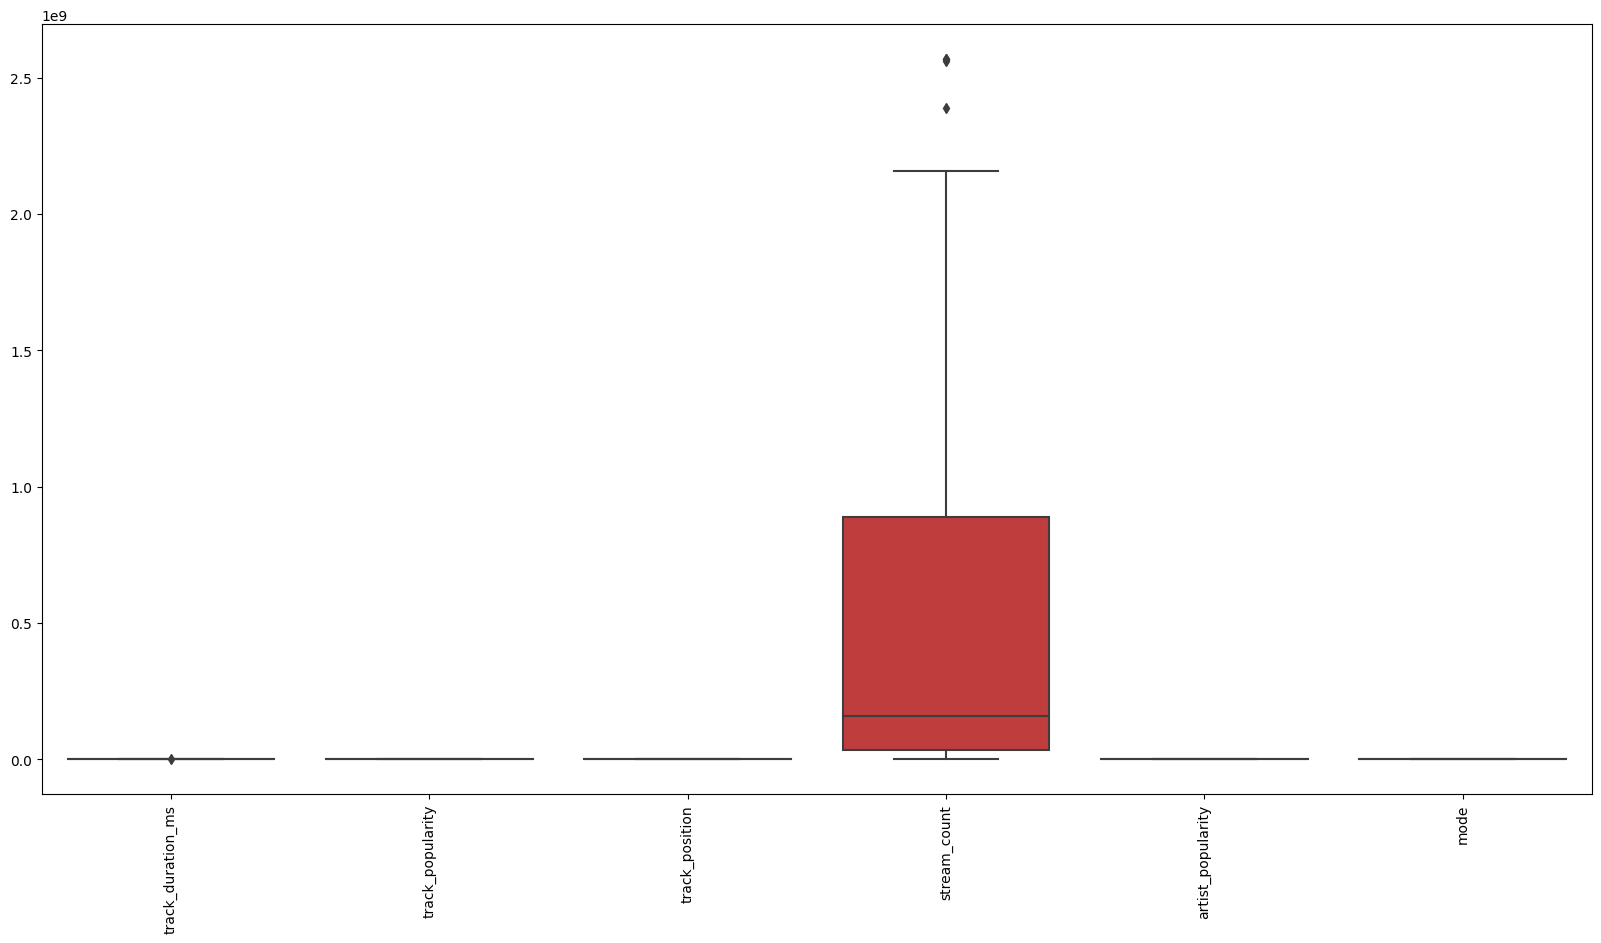

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical])
plt.xticks(rotation=90)
plt.show()

Qua biểu đồ ta thấy có một số dữ liệu ngoại lai ở cột `steam_count`. Nhóm quyết định xóa những dòng này.

In [23]:
Q1 = df['stream_count'].quantile(0.25)
Q3 = df['stream_count'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['stream_count'] >= Q1 - 1.5*IQR) & (df['stream_count'] <= Q3 + 1.5*IQR)]
df.shape

(261, 15)

### 1.4. Định dạng các cột, thêm xóa cột 

In [24]:
df.dtypes

artists_id            object
album_id              object
track_id              object
track_name            object
track_release_date    object
track_duration_ms      int64
track_popularity       int64
track_position         int64
is_explicit             bool
country               object
stream_count           int64
artist_name           object
artist_genres         object
artist_popularity      int64
mode                   int64
dtype: object

In [25]:
# track_release_date chuyển sang kiểu datetime
df['track_release_date'] = pd.to_datetime(df['track_release_date'])
# Thêm cột year
df['year'] = df['track_release_date'].dt.year
# Thêm cột month
df['month'] = df['track_release_date'].dt.month
# Thêm cột day
df['day'] = df['track_release_date'].dt.day

## 2. Phân tích dữ liệu

### 2.1. Phân bố dữ liệu từng cột 

#### 2.1.1. track_name

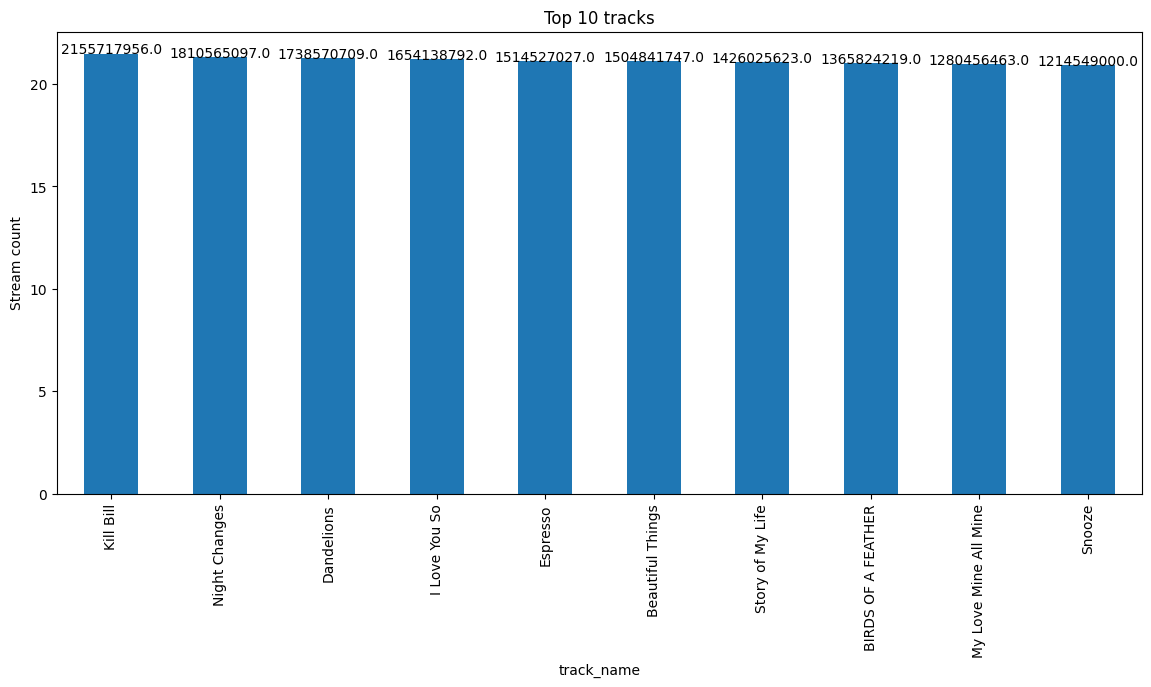

In [26]:
# Top 10 bài hát được nghe nhiều nhất
top_10 = df.groupby('track_name')['stream_count'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='bar')
plt.title('Top 10 tracks')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()

Nhận xét: 


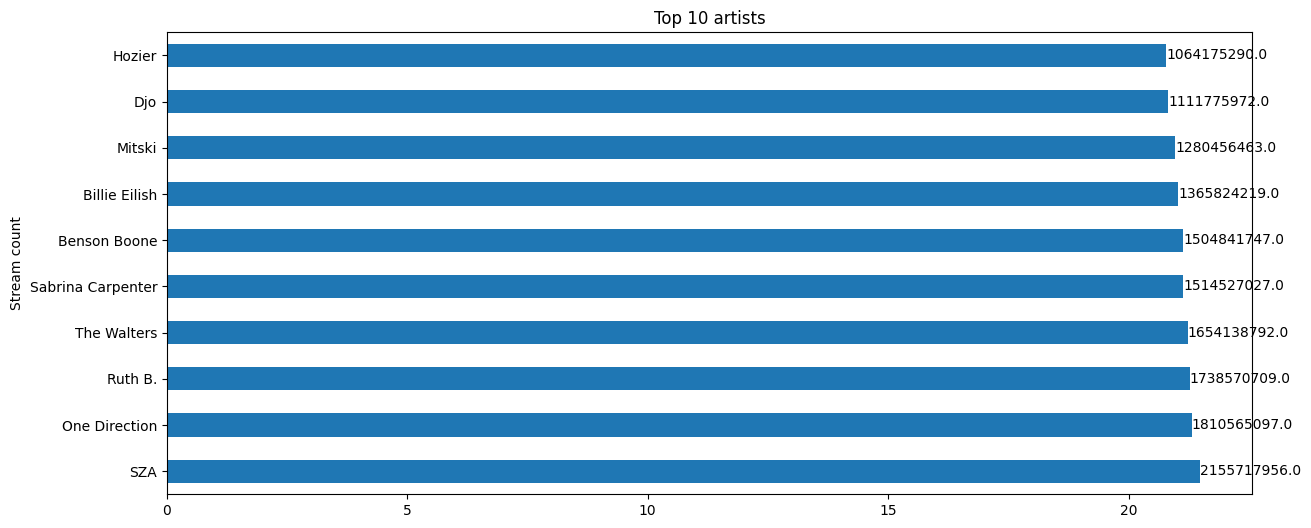

In [27]:
# Top 10 nghệ sĩ được nghe nhiều nhất
top_10 = df.groupby('artist_name')['stream_count'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='barh')
plt.title('Top 10 artists')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(value, index, str(round(np.exp(value), 2)), va = 'center')
plt.show()

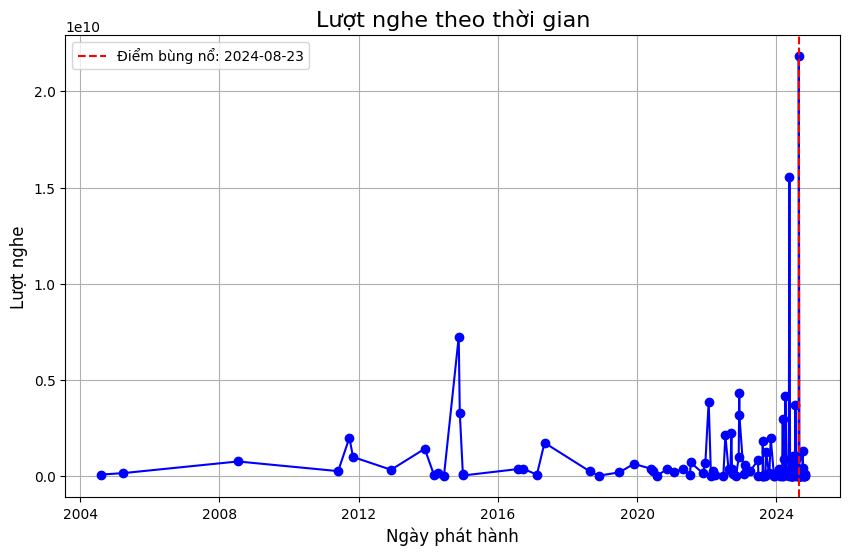

Điểm bùng nổ: 2024-08-23, Lượt nghe: 21825306196


In [28]:
df['track_release_date'] = pd.to_datetime(df['track_release_date'])

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Tính tổng lượt nghe theo ngày
daily_streams = df.groupby('track_release_date')['stream_count'].sum()

# Xác định ngày có lượt nghe cao nhất
peak_date = daily_streams.idxmax()
peak_streams = daily_streams.max()

# Vẽ biểu đồ xu hướng lượt nghe
plt.figure(figsize=(10, 6))
plt.plot(daily_streams.index, daily_streams.values, marker='o', linestyle='-', color='b')
plt.title("Lượt nghe theo thời gian", fontsize=16)
plt.xlabel("Ngày phát hành", fontsize=12)
plt.ylabel("Lượt nghe", fontsize=12)
plt.axvline(peak_date, color='r', linestyle='--', label=f"Điểm bùng nổ: {peak_date.date()}")
plt.legend()
plt.grid()
plt.show()

# Kết quả
print(f"Điểm bùng nổ: {peak_date.date()}, Lượt nghe: {peak_streams}")

In [29]:
df['country'].unique()

array(['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand',
       'Vietnam'], dtype=object)

In [33]:
tf = df[df['track_release_date'] == pd.Timestamp('2024-08-23')]

# Lấy theo track_name, country, trak_duration_ms, stream_count, artist_name
tf[['track_name', 'country', 'track_duration_ms', 'stream_count', 'artist_name']].drop_duplicates()

,track_name,country,track_duration_ms,stream_count,artist_name
298,Espresso,Malaysia,175459,1514527027,Sabrina Carpenter
312,Taste,Malaysia,157279,448894386,Sabrina Carpenter
326,Please Please Please,Malaysia,186365,957716490,Sabrina Carpenter
340,Taste,Philippines,157279,448894386,Sabrina Carpenter
354,Bed Chem,Philippines,171869,247338064,Sabrina Carpenter
368,Please Please Please,Philippines,186365,957716490,Sabrina Carpenter
382,Espresso,Philippines,175459,1514527027,Sabrina Carpenter
396,Taste,Singapore,157279,448894386,Sabrina Carpenter
410,Espresso,Singapore,175459,1514527027,Sabrina Carpenter
424,Please Please Please,Singapore,186365,957716490,Sabrina Carpenter


In [34]:
max_stream_song = df.loc[df['stream_count'].idxmax()]
print(max_stream_song[['track_name', 'stream_count']])

track_name       Kill Bill
stream_count    2155717956
Name: 553, dtype: object


In [35]:
# Group by track_release_date and find the song with the maximum stream count for each day
max_stream_per_day = df.loc[df.groupby('track_release_date')['stream_count'].idxmax()]

# Display the result
max_stream_per_day[['track_release_date', 'track_name', 'stream_count', 'artist_name']]

,track_release_date,track_name,stream_count,artist_name
741,2004-08-03,擱淺,86370631,Jay Chou
716,2005-03-24,Heaven Knows - This Angel Has Flown,159726527,Orange & Lemons
705,2008-07-14,The Man Who Can't Be Moved,767383741,The Script
175,2011-06-01,Seandainya,265381241,Vierra
186,2011-09-27,It Will Rain,1000578599,Bruno Mars
...,...,...,...,...
578,2024-10-21,Whiplash,25989395,aespa
753,2024-10-22,ขอโทษละกัน (friend to friend),1890049,PP Krit
789,2024-10-24,Unconditional,3078006,JAEHYUN
724,2024-10-25,I'll Be There,26890712,Jin


In [36]:
# Group by artist_name and count the number of songs for each artist
artist_song_count = df.groupby('artist_name')['track_name'].nunique()

# Filter artists with at least 2 songs in the top charts
top_artists = artist_song_count[artist_song_count >= 2].sort_values(ascending=False).head(10)

# Display the result
print(top_artists)

artist_name
Sabrina Carpenter    6
Bernadya             6
Insomniacks          4
fellow fellow        3
Maki                 3
HIEUTHUHAI           3
SZA                  3
PUN                  3
Juicy Luicy          3
Mahalini             3
Name: track_name, dtype: int64


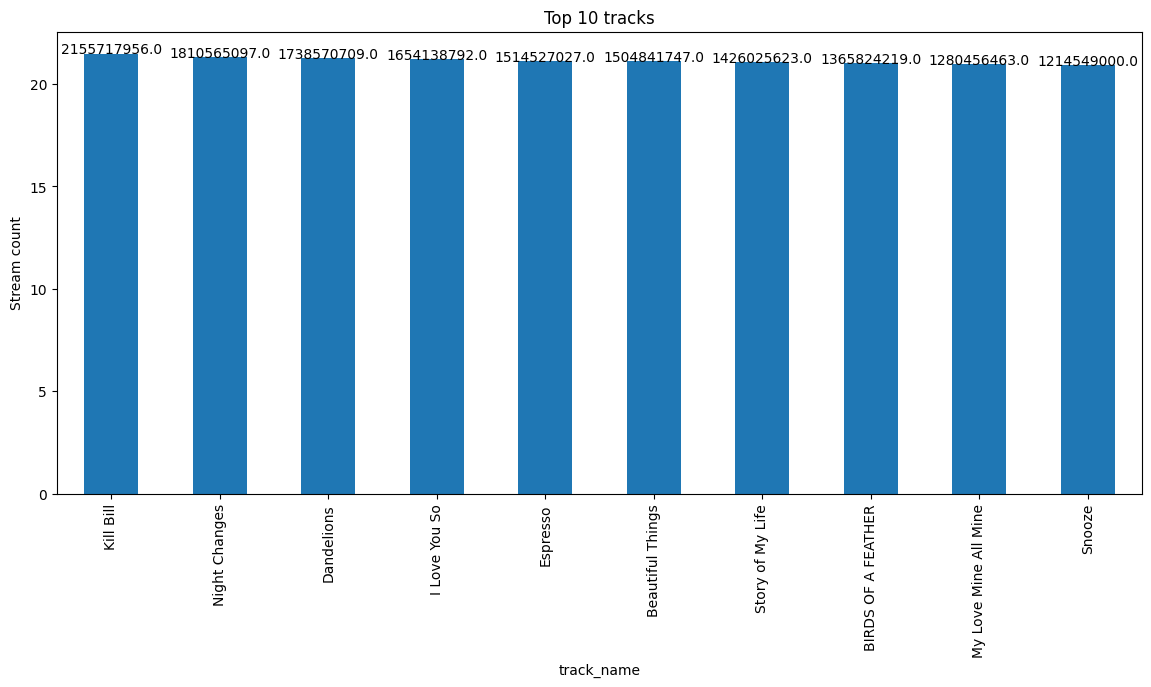

In [38]:
# Top bài hát được nghe nhiều nhất
top_10 = df.groupby('track_name')['stream_count'].max().sort_values(ascending=False).head(10)
top_10 = np.log(top_10)

plt.figure(figsize=(14, 6))
top_10.plot(kind='bar')
plt.title('Top 10 tracks')
plt.ylabel('Stream count')
for index, value in enumerate(top_10):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()

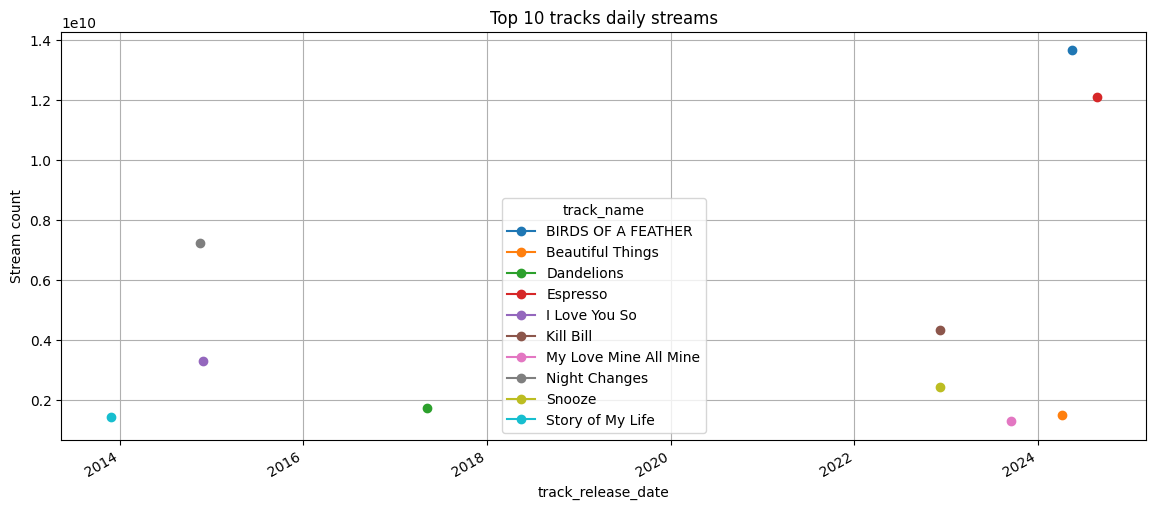

In [39]:
# stream_count theo ngày của top 10 bài hát được nghe nhiều nhất
top_10_songs = top_10.index
top_10_daily_streams = df[df['track_name'].isin(top_10_songs)].groupby(['track_release_date', 'track_name'])['stream_count'].sum().unstack()

plt.figure(figsize=(14, 6))
top_10_daily_streams.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Top 10 tracks daily streams')
plt.ylabel('Stream count')
plt.grid()
plt.show()


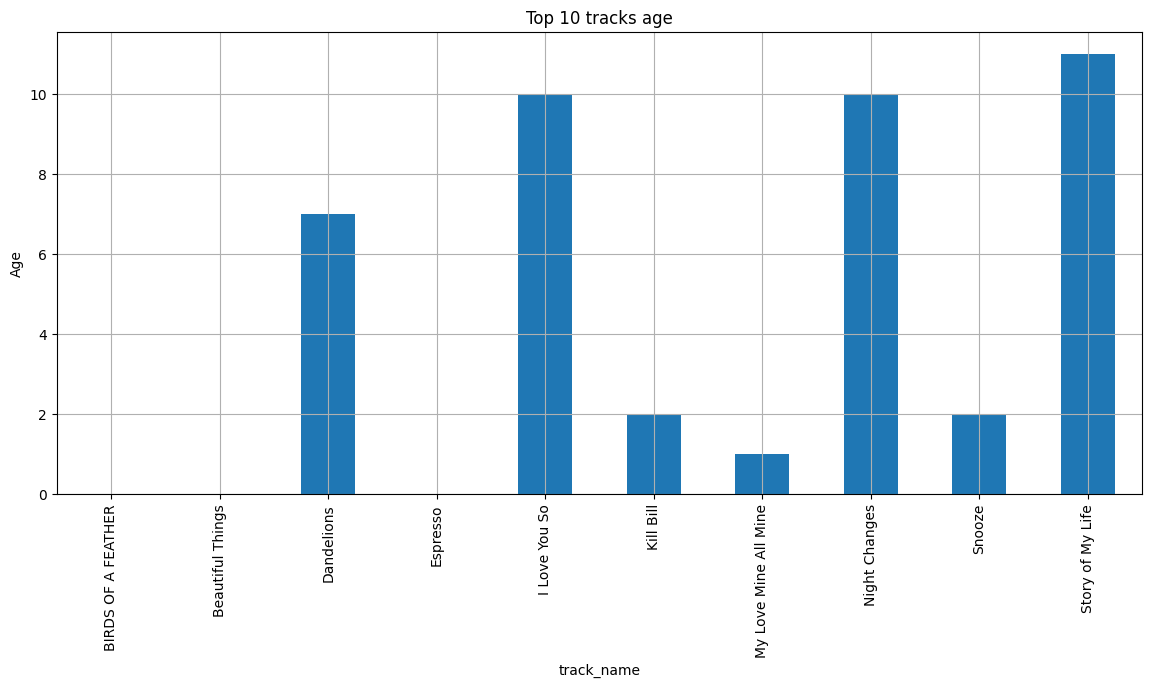

In [44]:
# tuổi của top 10 bài hát được nghe nhiều nhất ("Tuổi = 2024 - năm phát hành")
top_10_songs = top_10.index
top_10_age = df[df['track_name'].isin(top_10_songs)].groupby('track_name')['year'].max()
top_10_age = 2024 - top_10_age

plt.figure(figsize=(14, 6))
top_10_age.plot(kind='bar')
plt.title('Top 10 tracks age')
plt.ylabel('Age')
plt.grid()
plt.show()



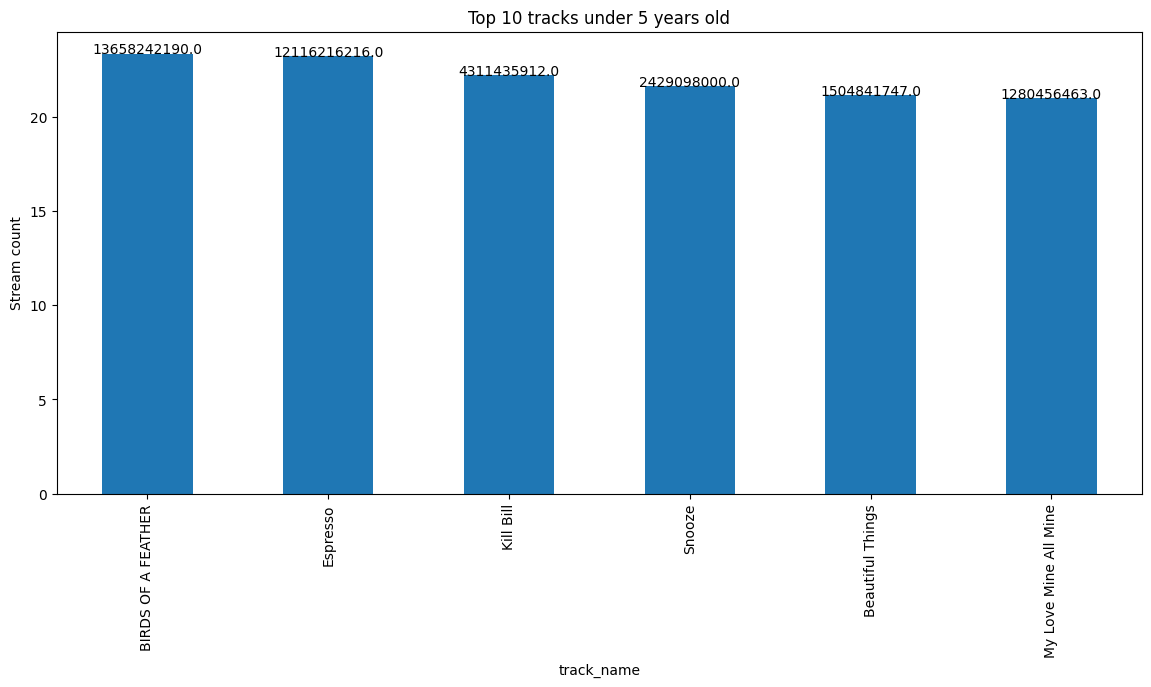

In [45]:
# Những bài hát dưới 5 tuổi được nghe nhiều nhất
top_10_songs = top_10_age[top_10_age < 5].index
top_10_songs_streams = df[df['track_name'].isin(top_10_songs)].groupby('track_name')['stream_count'].sum().sort_values(ascending=False).head(10)
top_10_songs_streams = np.log(top_10_songs_streams)

plt.figure(figsize=(14, 6))
top_10_songs_streams.plot(kind='bar')
plt.title('Top 10 tracks under 5 years old')
plt.ylabel('Stream count')
for index, value in enumerate(top_10_songs_streams):
    plt.text(index, value, str(round(np.exp(value), 2)), ha = 'center')
plt.show()


In [47]:
# Bài hát được nghe nhiều nhất của từng năm 
top_song_per_year = df.loc[df.groupby('year')['stream_count'].idxmax()][['year', 'track_name', 'stream_count']]
top_song_per_year

,year,track_name,stream_count
741,2004,擱淺,86370631
716,2005,Heaven Knows - This Angel Has Flown,159726527
705,2008,The Man Who Can't Be Moved,767383741
186,2011,It Will Rain,1000578599
695,2012,Tadhana,336328268
170,2013,Story of My Life,1426025623
150,2014,Night Changes,1810565097
714,2015,Randomantic,39246022
126,2016,Duka,382373441
650,2017,Dandelions,1738570709


In [49]:
# Những bài hát này thuộc thể loại nào và của nghệ sĩ nào
top_song_per_year = df.loc[df.groupby('year')['stream_count'].idxmax()][['year', 'track_name', 'stream_count', 'artist_genres', 'artist_name']]
top_song_per_year


,year,track_name,stream_count,artist_genres,artist_name
741,2004,擱淺,86370631,"['c-pop', 'mandopop', 'taiwan pop', 'zhongguo ...",Jay Chou
716,2005,Heaven Knows - This Angel Has Flown,159726527,['opm'],Orange & Lemons
705,2008,The Man Who Can't Be Moved,767383741,"['celtic rock', 'pop']",The Script
186,2011,It Will Rain,1000578599,"['dance pop', 'pop']",Bruno Mars
695,2012,Tadhana,336328268,['opm'],Up Dharma Down
170,2013,Story of My Life,1426025623,"['boy band', 'pop', 'post-teen pop', 'talent s...",One Direction
150,2014,Night Changes,1810565097,"['boy band', 'pop', 'post-teen pop', 'talent s...",One Direction
714,2015,Randomantic,39246022,"['deep neofolk', 'opm', 'pinoy r&b']",James Reid
126,2016,Duka,382373441,"['indonesian pop punk', 'indonesian rock']",Last Child
650,2017,Dandelions,1738570709,"['alt z', 'canadian contemporary r&b', 'canadi...",Ruth B.


In [51]:
df_vn = df[df['country'] == 'Vietnam']
df_vn.head()

,artists_id,album_id,track_id,track_name,track_release_date,track_duration_ms,track_popularity,track_position,is_explicit,country,stream_count,artist_name,artist_genres,artist_popularity,mode,year,month,day
243,5L1lO4eRHmJ7a0Q6csE5cT,2F84s5tvr9RSS6VI772mVb,3yDRcs0Y4pPzkvMbUfeF9H,Moonlit Floor (Kiss Me),2024-10-03,155757,89,23,False,Vietnam,107590368,LISA,['k-pop'],84,0,2024,10,3
248,5L1lO4eRHmJ7a0Q6csE5cT,2F84s5tvr9RSS6VI772mVb,3yDRcs0Y4pPzkvMbUfeF9H,Moonlit Floor (Kiss Me),2024-10-03,155757,89,23,False,Vietnam,107590368,LISA,['k-pop'],84,1,2024,10,3
293,250b0Wlc5Vk0CoUsaCY84M,3e5tDT1kfaAGx10yOjIDgW,2CspwnypzT7rcWI9RfsoSb,Mantra,2024-10-10,136627,89,32,True,Vietnam,85540665,JENNIE,['k-pop'],83,0,2024,10,10
530,1oSPZhvZMIrWW5I41kPkkY,15XcLhiVMlSOipUddTNDnr,7tI8dRuH2Yc6RuoTjxo4dU,Who,2024-07-19,170887,92,2,False,Vietnam,890342043,Jimin,['k-pop'],88,0,2024,7,19
620,6YVMFz59CuY7ngCxTxjpxE,6RRuiUup6Z0Y0MxkCXOGyU,7Cnpb1vBbC46RgVyyKLH7p,Whiplash,2024-10-21,183226,65,42,False,Vietnam,25989395,aespa,['k-pop girl group'],83,0,2024,10,21


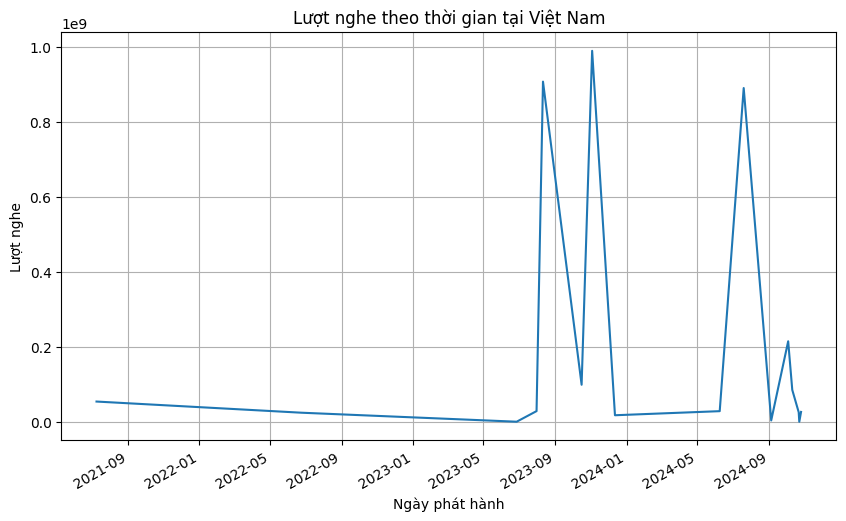

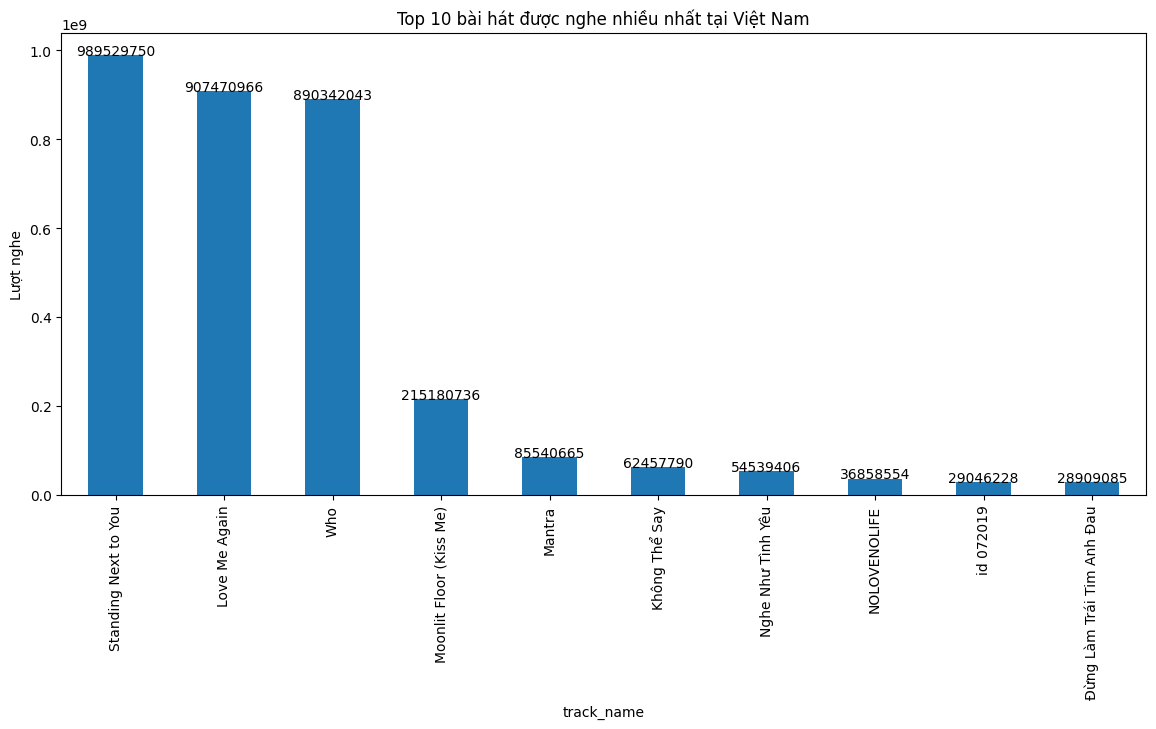

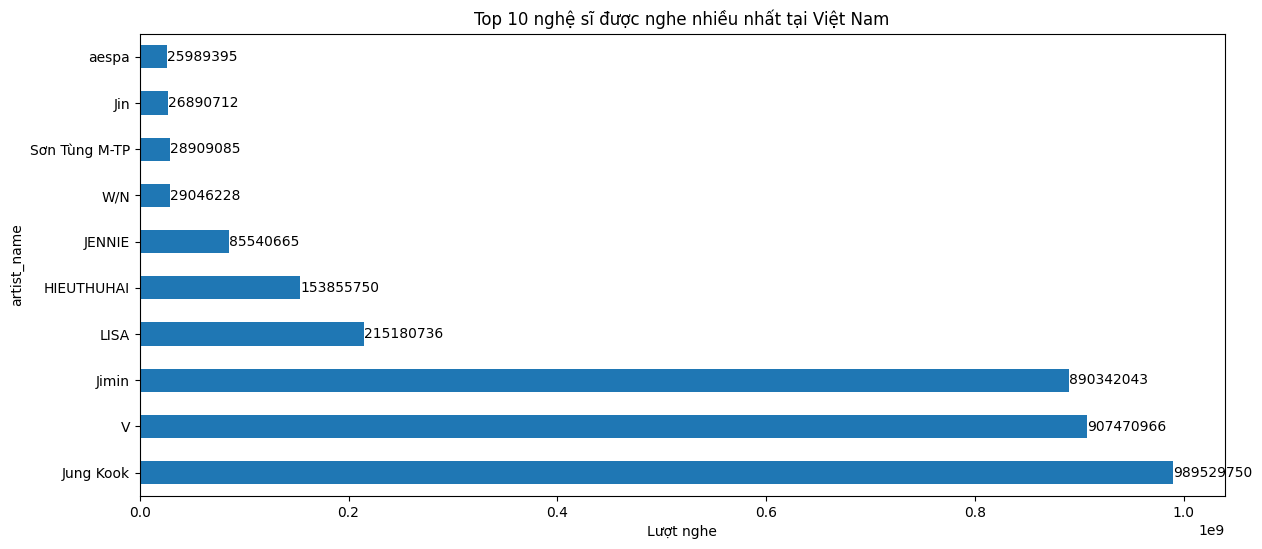

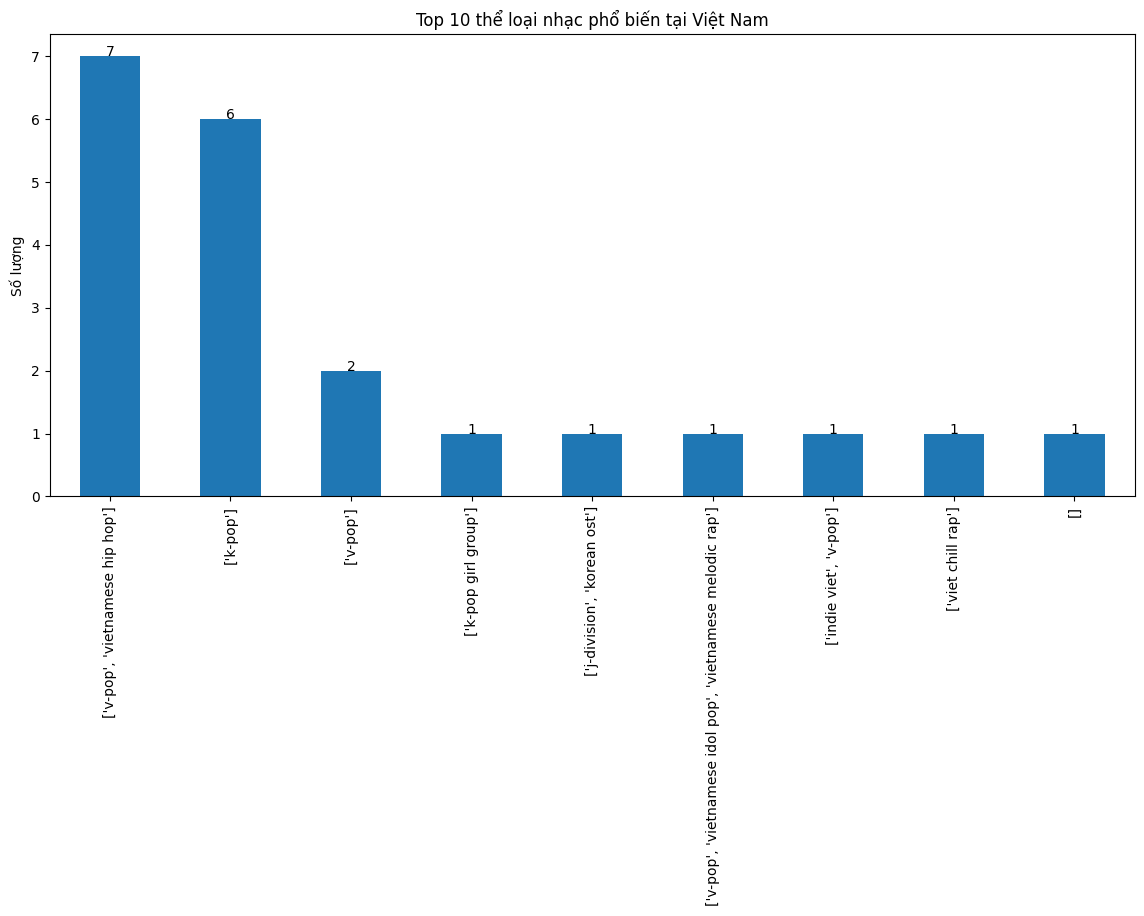

In [ ]:
# Phân bố lượt nghe theo thời gian
plt.figure(figsize=(10, 6))
df_vn.groupby('track_release_date')['stream_count'].sum().plot()
plt.title('Lượt nghe theo thời gian tại Việt Nam')
plt.xlabel('Ngày phát hành')
plt.ylabel('Lượt nghe')
plt.grid()
plt.show()

# Top 10 bài hát được nghe nhiều nhất
top_10_tracks_vn = df_vn.groupby('track_name')['stream_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
top_10_tracks_vn.plot(kind='bar')
plt.title('Top 10 bài hát được nghe nhiều nhất tại Việt Nam')
plt.ylabel('Lượt nghe')
for index, value in enumerate(top_10_tracks_vn):
    plt.text(index, value, str(value), ha='center')
plt.show()

# Top 10 nghệ sĩ được nghe nhiều nhất
top_10_artists_vn = df_vn.groupby('artist_name')['stream_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
top_10_artists_vn.plot(kind='barh')
plt.title('Top 10 nghệ sĩ được nghe nhiều nhất tại Việt Nam')
plt.xlabel('Lượt nghe')
for index, value in enumerate(top_10_artists_vn):
    plt.text(value, index, str(value), va='center')
plt.show()

# Phân tích thể loại nhạc phổ biến
genres_vn = df_vn['artist_genres'].explode().value_counts().head(10)
plt.figure(figsize=(14, 6))
genres_vn.plot(kind='bar')
plt.title('Top 10 thể loại nhạc phổ biến tại Việt Nam')
plt.ylabel('Số lượng')
for index, value in enumerate(genres_vn):
    plt.text(index, value, str(value), ha='center')
plt.show()